In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings('ignore')

In [2]:
hr_df = pd.read_csv('/content/DS3_C6_S3_Clustering_AbsenteeismAtWork_Data_Project.csv', sep=';')
hr_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [3]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [4]:
hr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,740.0,18.017568,11.021247,1.000,9.000,18.000,28.000,36.000
Reason for absence,740.0,19.216216,8.433406,0.000,13.000,23.000,26.000,28.000
Month of absence,740.0,6.324324,3.436287,0.000,3.000,6.000,9.000,12.000
Day of the week,740.0,3.914865,1.421675,2.000,3.000,4.000,5.000,6.000
Seasons,740.0,2.544595,1.111831,1.000,2.000,3.000,4.000,4.000
Transportation expense,740.0,221.329730,66.952223,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,740.0,29.631081,14.836788,5.000,16.000,26.000,50.000,52.000
Service time,740.0,12.554054,4.384873,1.000,9.000,13.000,16.000,29.000
Age,740.0,36.450000,6.478772,27.000,31.000,37.000,40.000,58.000
Work load Average/day,740.0,271.490235,39.058116,205.917,244.387,264.249,294.217,378.884


In [5]:
hr_df.shape

(740, 21)

In [6]:
hr_df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [7]:
copy_df = hr_df.drop_duplicates()

In [8]:
copy_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [9]:
copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 706 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               706 non-null    int64  
 1   Reason for absence               706 non-null    int64  
 2   Month of absence                 706 non-null    int64  
 3   Day of the week                  706 non-null    int64  
 4   Seasons                          706 non-null    int64  
 5   Transportation expense           706 non-null    int64  
 6   Distance from Residence to Work  706 non-null    int64  
 7   Service time                     706 non-null    int64  
 8   Age                              706 non-null    int64  
 9   Work load Average/day            706 non-null    float64
 10  Hit target                       706 non-null    int64  
 11  Disciplinary failure             706 non-null    int64  
 12  Education             

In [10]:
copy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,706.0,18.192635,10.927472,1.000,10.000,18.000,28.000,36.000
Reason for absence,706.0,18.882436,8.482877,0.000,13.000,23.000,26.000,28.000
Month of absence,706.0,6.410765,3.404811,0.000,3.000,6.000,9.750,12.000
Day of the week,706.0,3.890935,1.425503,2.000,3.000,4.000,5.000,6.000
Seasons,706.0,2.549575,1.121527,1.000,2.000,3.000,4.000,4.000
Transportation expense,706.0,222.977337,67.293426,118.000,179.000,225.000,260.000,388.000
Distance from Residence to Work,706.0,29.297450,14.706661,5.000,16.000,26.000,49.000,52.000
Service time,706.0,12.495751,4.370190,1.000,9.000,13.000,16.000,29.000
Age,706.0,36.478754,6.563404,27.000,31.000,37.000,40.000,58.000
Work load Average/day,706.0,272.089984,39.458780,205.917,244.387,264.604,294.217,378.884


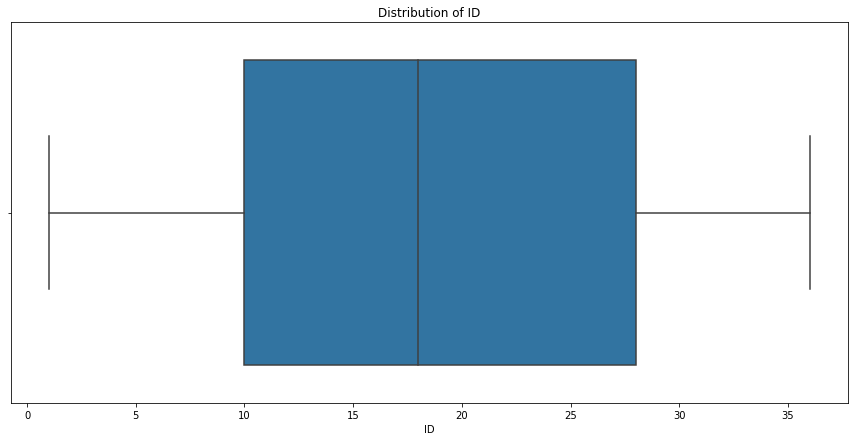

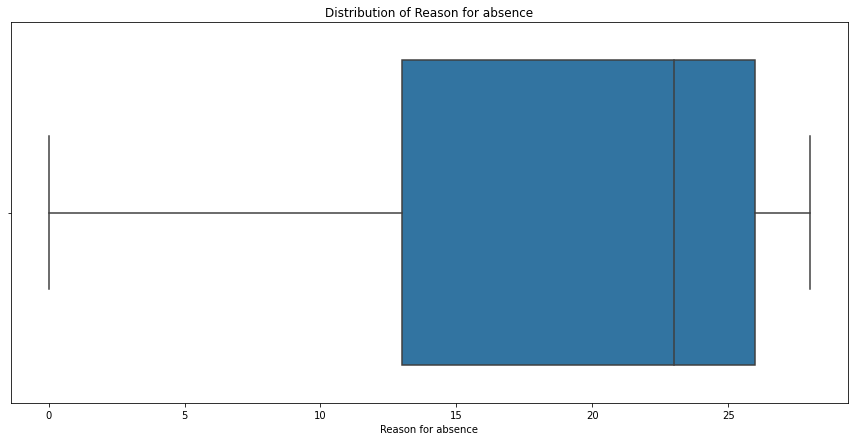

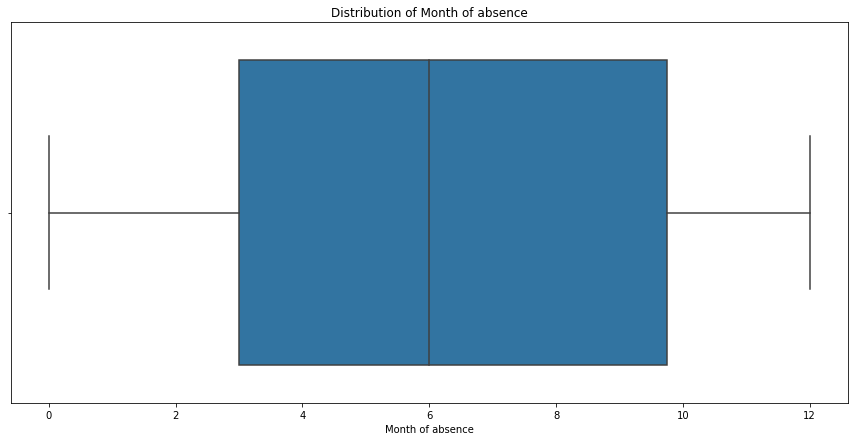

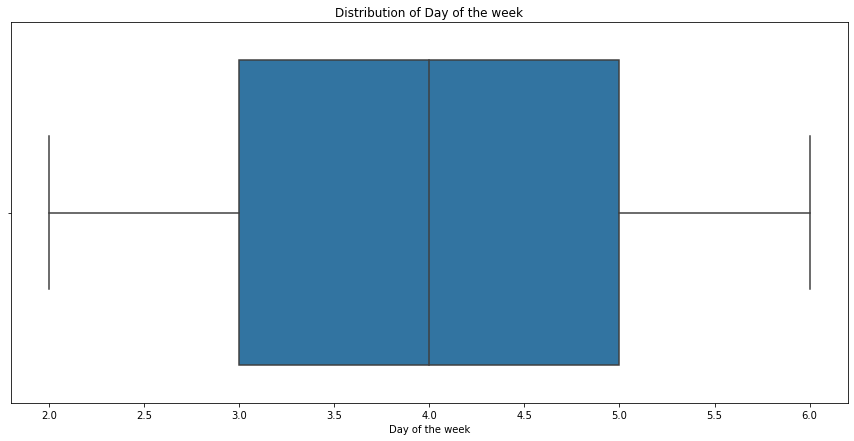

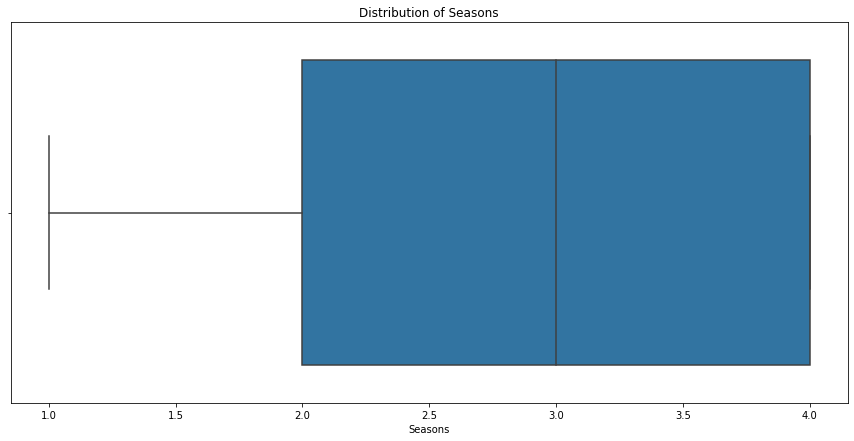

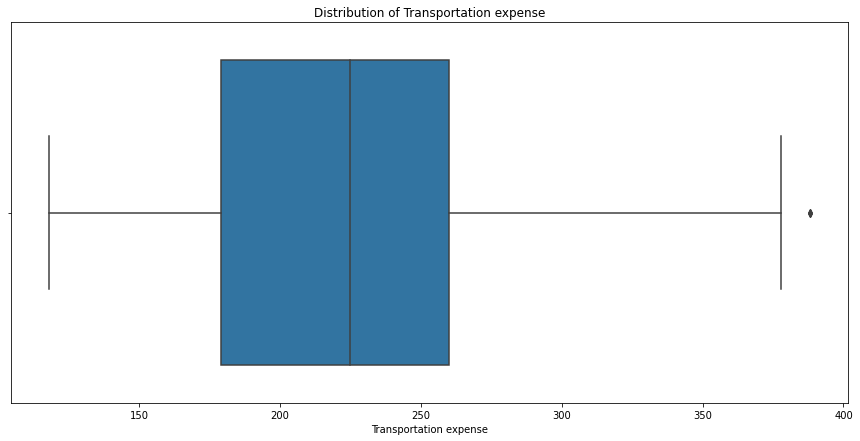

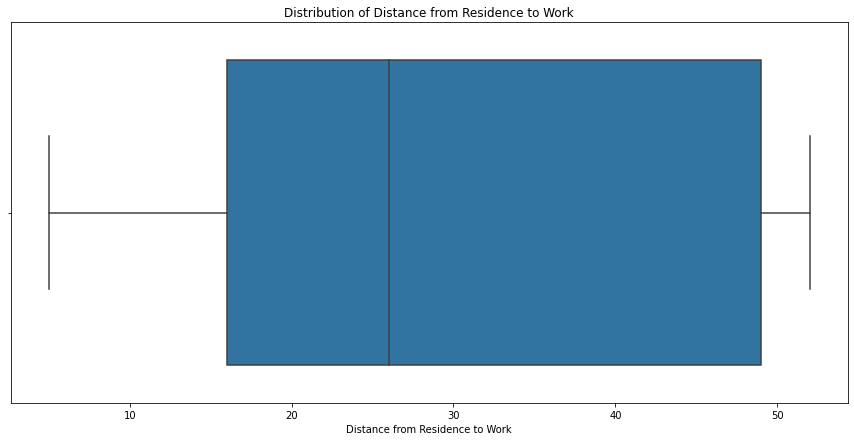

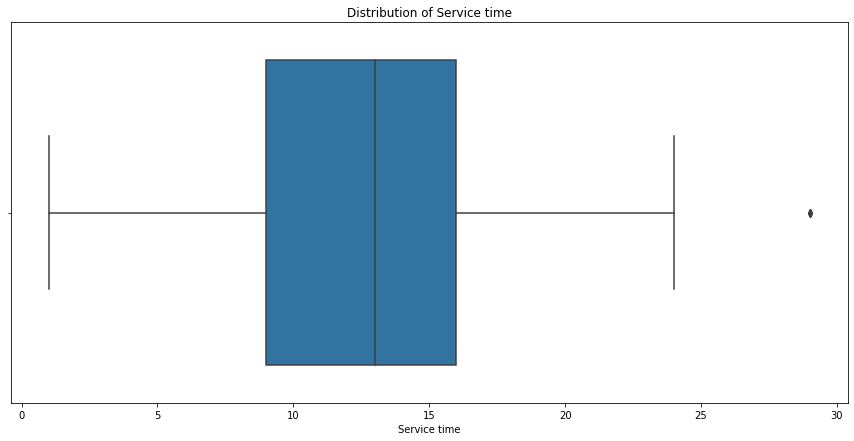

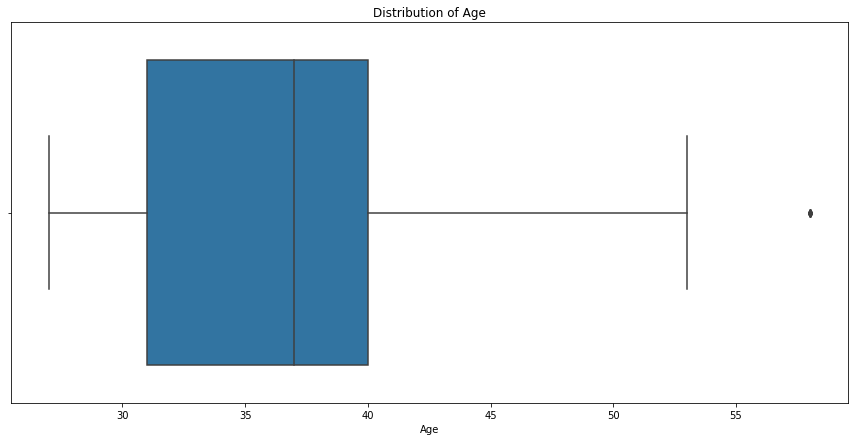

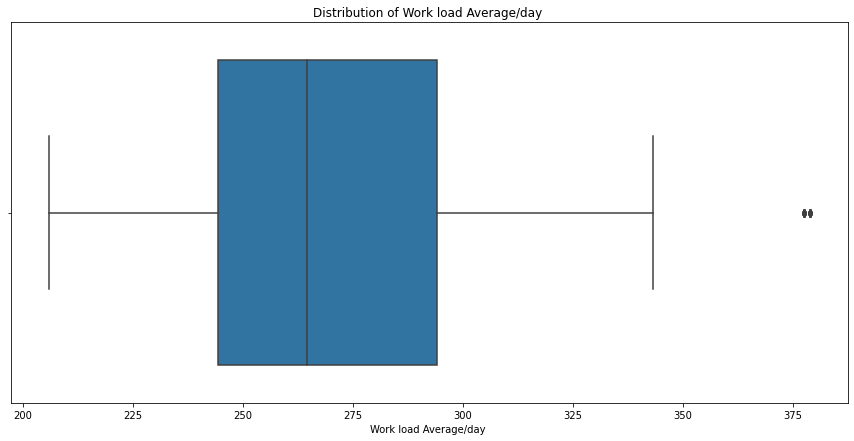

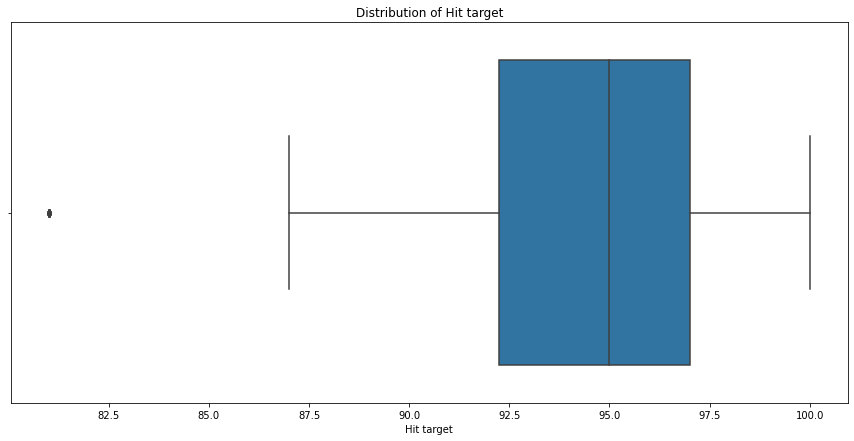

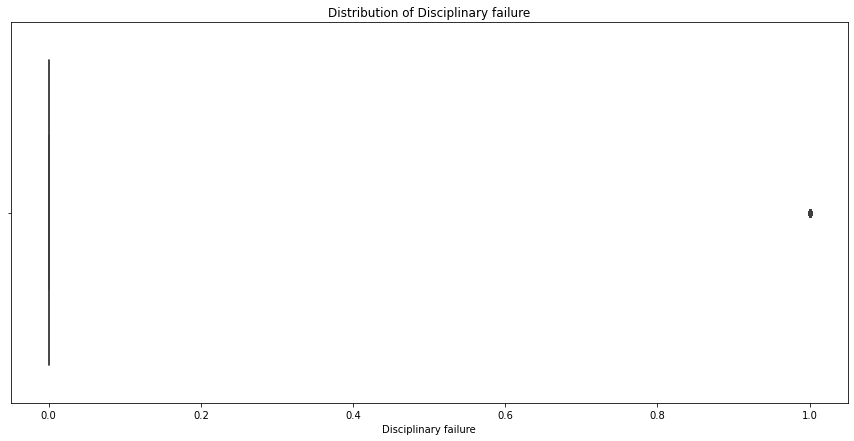

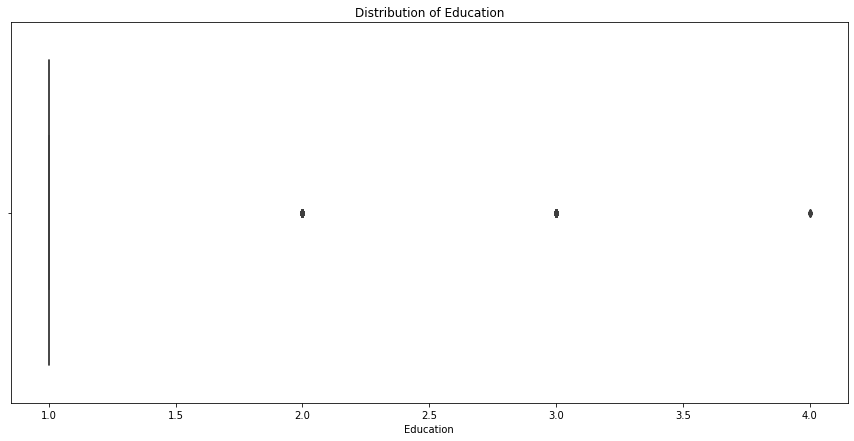

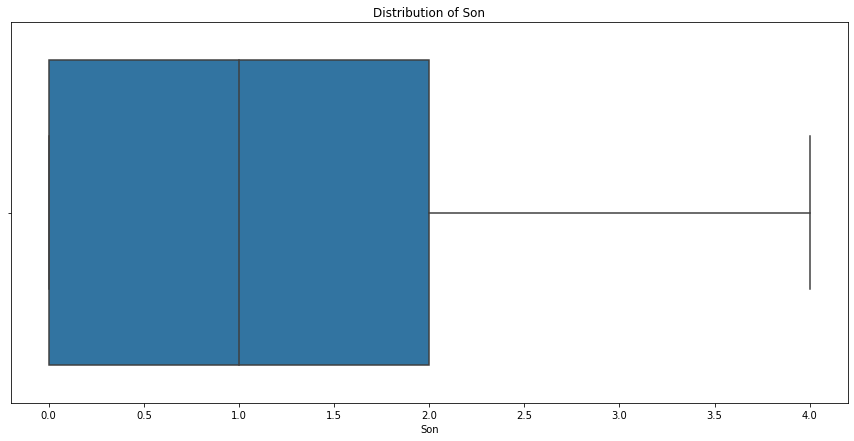

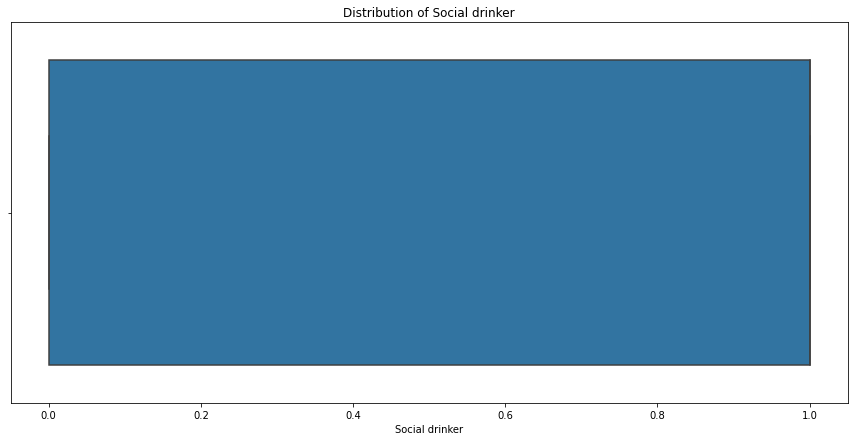

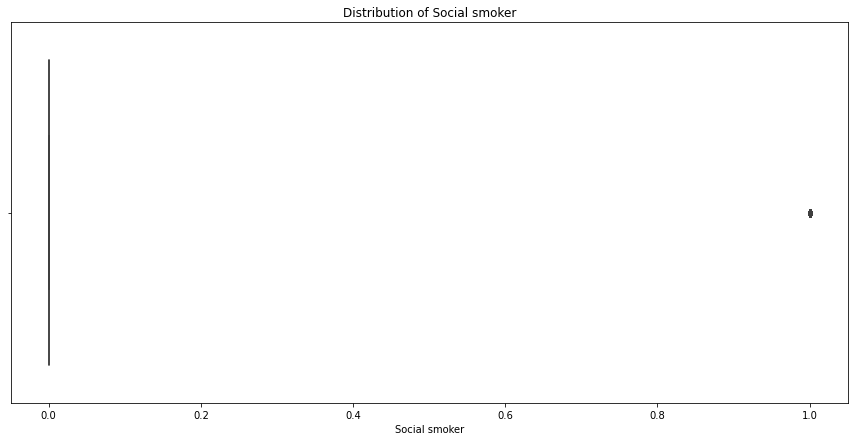

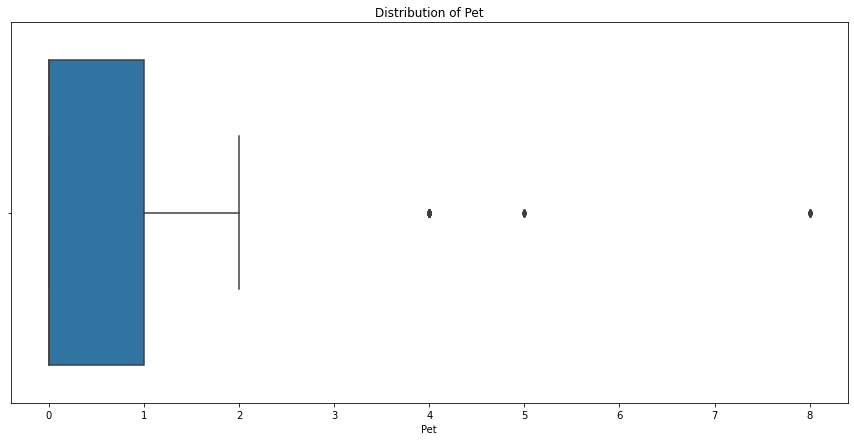

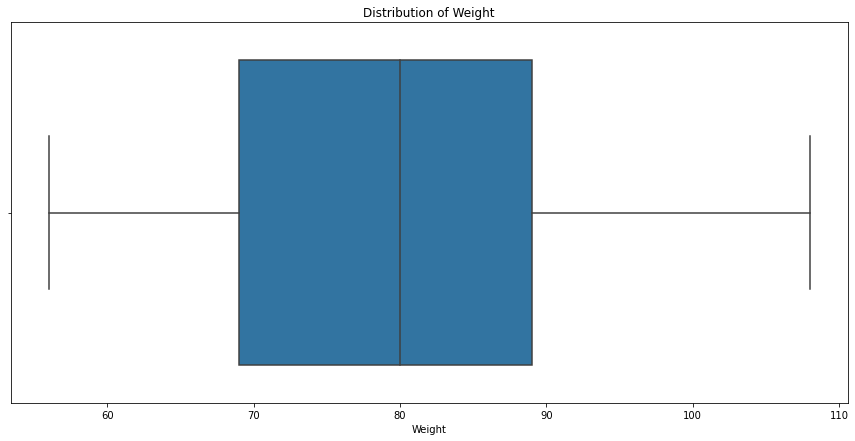

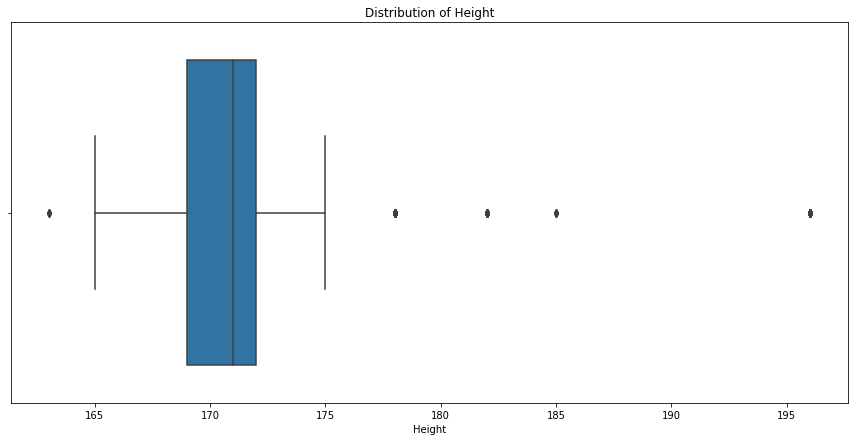

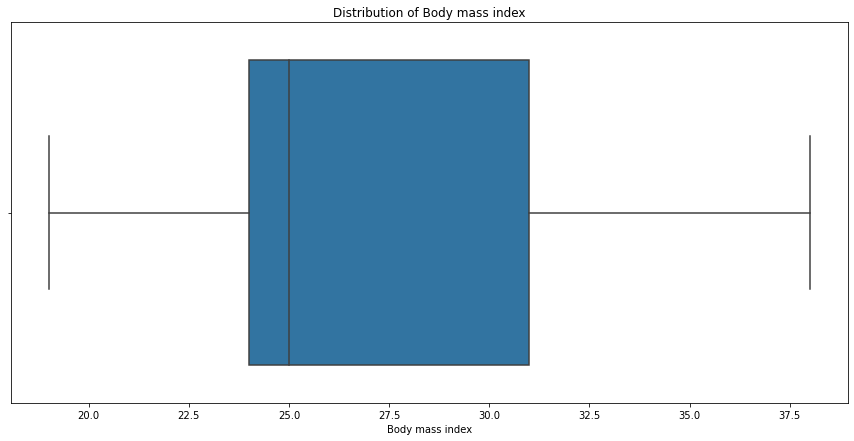

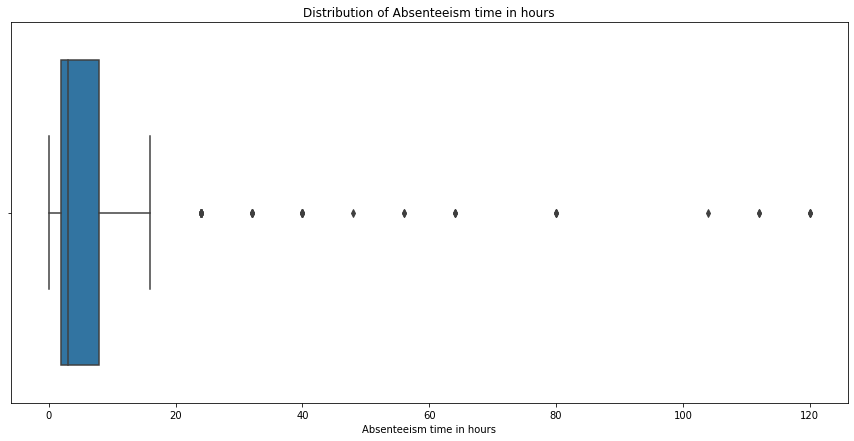

In [11]:
for i in copy_df.columns:
    plt.figure(figsize=(15,7))
    sb.boxplot(copy_df[i])
    plt.title(f'Distribution of {i}');

### Month Wise Absenteeism time:

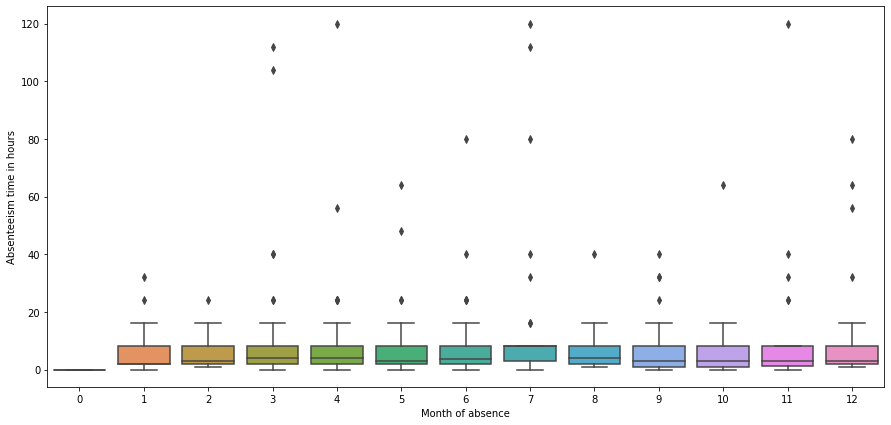

In [12]:
plt.figure(figsize=(15,7))
sb.boxplot(x=copy_df['Month of absence'], y=copy_df['Absenteeism time in hours']);

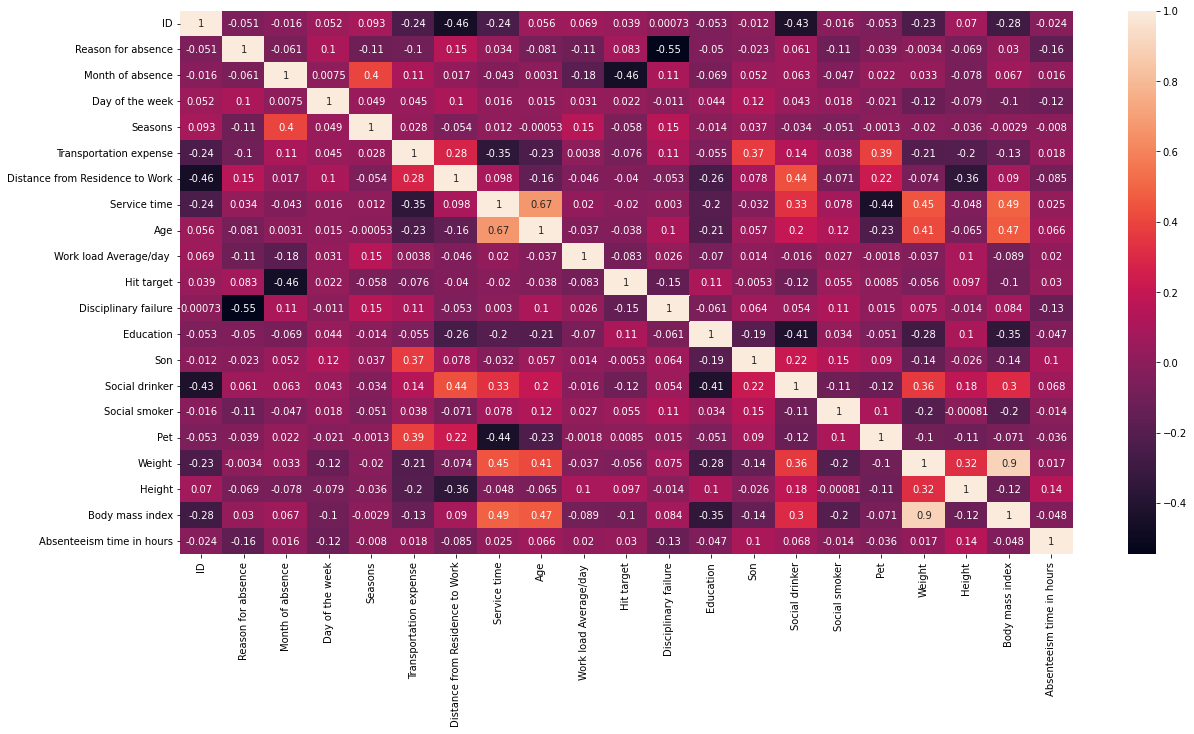

In [13]:
plt.figure(figsize=(20,10))
sb.heatmap(copy_df.corr(), annot=True);

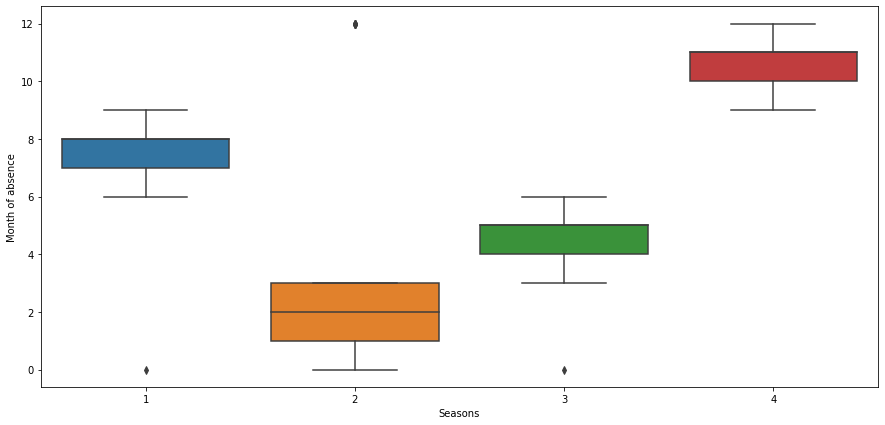

In [14]:
plt.figure(figsize=(15,7))
sb.boxplot(x=copy_df['Seasons'], y=copy_df['Month of absence']);

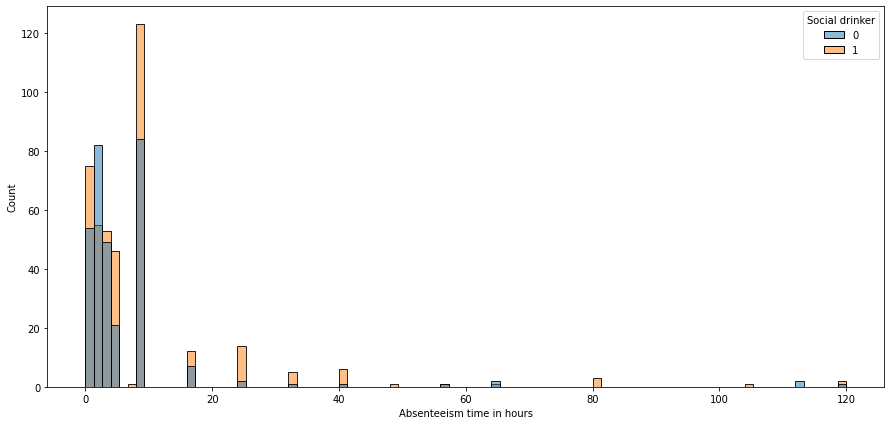

In [15]:
plt.figure(figsize=(15,7))
sb.histplot(hue=copy_df['Social drinker'], x=copy_df['Absenteeism time in hours']);

### For Tableau Visualization:

In [16]:
file_name = 'Absentism_Data.xlsx'

In [17]:
hr_df.to_excel(file_name)

#### Further EDA done with Tableau

In [18]:
copy_df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [19]:
copy_df.drop('ID', axis=1, inplace=True)

## Feature Engineering:

### Scaling of the data:

In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(copy_df)
df_scaled

array([[ 0.8396455 ,  0.17318229, -0.62543981, ..., -0.03290573,
         0.79118362, -0.23113317],
       [-2.22752522,  0.17318229, -0.62543981, ...,  0.94184018,
         1.02637336, -0.52528371],
       [ 0.48574119,  0.17318229,  0.07656417, ..., -0.35782103,
         1.02637336, -0.37820844],
       ...,
       [-2.22752522, -1.88418996, -0.62543981, ..., -0.35782103,
         1.73194259, -0.52528371],
       [-2.22752522, -1.88418996,  0.07656417, ..., -0.35782103,
         1.96713233, -0.52528371],
       [-2.22752522, -1.88418996,  1.48057214, ...,  0.45446723,
        -0.38476509, -0.52528371]])

### Dimension Reduction:

#### Using PCA Method because it is unsupervised Learning

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
pca_df = pca.fit_transform(df_scaled)

In [22]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio

array([0.16458748, 0.11321575, 0.09484423, 0.0772228 ])

### Apply different clustering algorithms and compare model performances without and with reduced dimensions.

## KMEAN ALGORITHM:

### Without Dimensions Reduction:

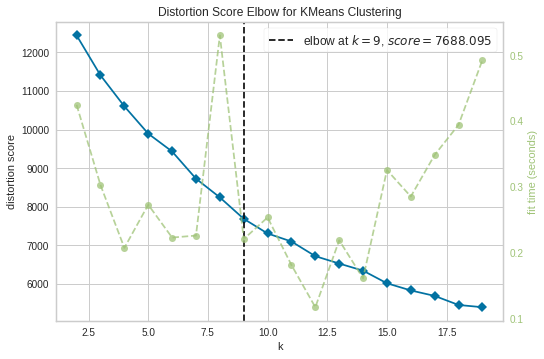

In [23]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

km = KMeans(random_state=42)

visual = KElbowVisualizer(km, k=(2,20), timings=True)

visual.fit(df_scaled)
visual.show();

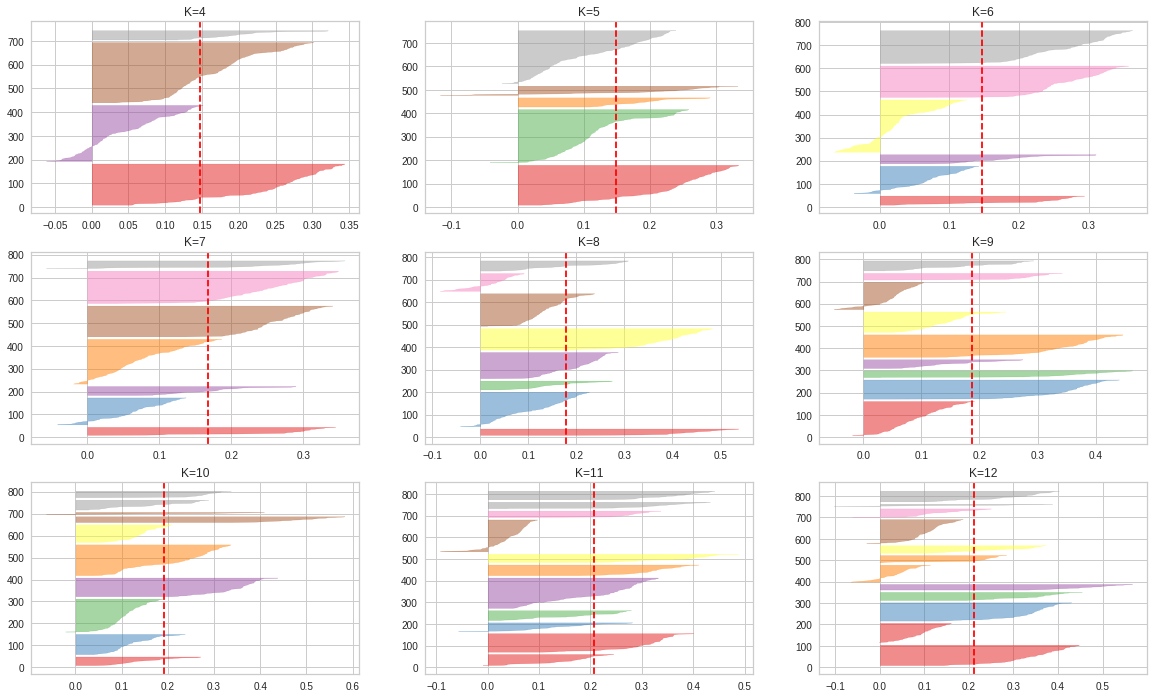

In [24]:
from yellowbrick.cluster import SilhouetteVisualizer

fig , axes = plt.subplots(3,3,figsize=(20,12))

for i,ax in zip([4,5,6,7,8,9,10,11,12],axes.flatten()):
    model1 = KMeans(n_clusters = i, random_state=42)
    ax.set_title(f'K={i}')
    Visualizer = SilhouetteVisualizer(model1 , color = 'yellowbrick' , ax = ax)
    Visualizer.fit(df_scaled)

In [25]:
from sklearn.metrics import silhouette_score

km = KMeans(n_clusters=9, random_state=42)
km.fit(df_scaled)
km_score = silhouette_score(df_scaled, km.labels_)
print('Silhouette score of KMeans with all Dimensions is', km_score)

Silhouette score of KMeans with all Dimensions is 0.18632452140789393


In [26]:
for i in range(10,31):
    km_exp = KMeans(n_clusters=i, random_state=42)
    km_exp.fit(df_scaled)
    km_score_exp = silhouette_score(df_scaled, km_exp.labels_)
    print(f'Silhouette score of KMeans with all Dimensions and number of clusters as {i} is', km_score_exp)

Silhouette score of KMeans with all Dimensions and number of clusters as 10 is 0.19244094471264075
Silhouette score of KMeans with all Dimensions and number of clusters as 11 is 0.20715102617867245
Silhouette score of KMeans with all Dimensions and number of clusters as 12 is 0.21056741283820257
Silhouette score of KMeans with all Dimensions and number of clusters as 13 is 0.21773814891725926
Silhouette score of KMeans with all Dimensions and number of clusters as 14 is 0.20938188395537427
Silhouette score of KMeans with all Dimensions and number of clusters as 15 is 0.21938948296840205
Silhouette score of KMeans with all Dimensions and number of clusters as 16 is 0.22788907771919262
Silhouette score of KMeans with all Dimensions and number of clusters as 17 is 0.22741886683582785
Silhouette score of KMeans with all Dimensions and number of clusters as 18 is 0.2279821527545425
Silhouette score of KMeans with all Dimensions and number of clusters as 19 is 0.24523245454522055
Silhouette 

### With Dimension Reduction:

In [27]:
km_pca = KMeans(n_clusters=9, random_state=42)
km_pca.fit_predict(pca_df)
km_pca_score = silhouette_score(pca_df, km_pca.labels_)
print('Silhouette Score of KMean without all dimensions is', km_pca_score)

Silhouette Score of KMean without all dimensions is 0.3054797684179529


In [28]:
for i in range(10,30):
    km_pca_exp = KMeans(n_clusters=i, random_state=42)
    km_pca_exp.fit_predict(pca_df)
    km_pca_score_exp = silhouette_score(pca_df, km_pca_exp.labels_)
    print(f'Silhouette Score of KMean without all dimensions and number of clusters {i} is', km_pca_score_exp)

Silhouette Score of KMean without all dimensions and number of clusters 10 is 0.3135218682649487
Silhouette Score of KMean without all dimensions and number of clusters 11 is 0.3227538467762842
Silhouette Score of KMean without all dimensions and number of clusters 12 is 0.3282863377505266
Silhouette Score of KMean without all dimensions and number of clusters 13 is 0.3290318303714041
Silhouette Score of KMean without all dimensions and number of clusters 14 is 0.34724330867285946
Silhouette Score of KMean without all dimensions and number of clusters 15 is 0.351661701217464
Silhouette Score of KMean without all dimensions and number of clusters 16 is 0.35176060891936983
Silhouette Score of KMean without all dimensions and number of clusters 17 is 0.36390395846455176
Silhouette Score of KMean without all dimensions and number of clusters 18 is 0.36015396084205
Silhouette Score of KMean without all dimensions and number of clusters 19 is 0.3636799922881227
Silhouette Score of KMean with

## AGGLOMERATIVE CLUSTERING:

### LINKAGE WITH WARD:

### Without Dimensions Reduction:

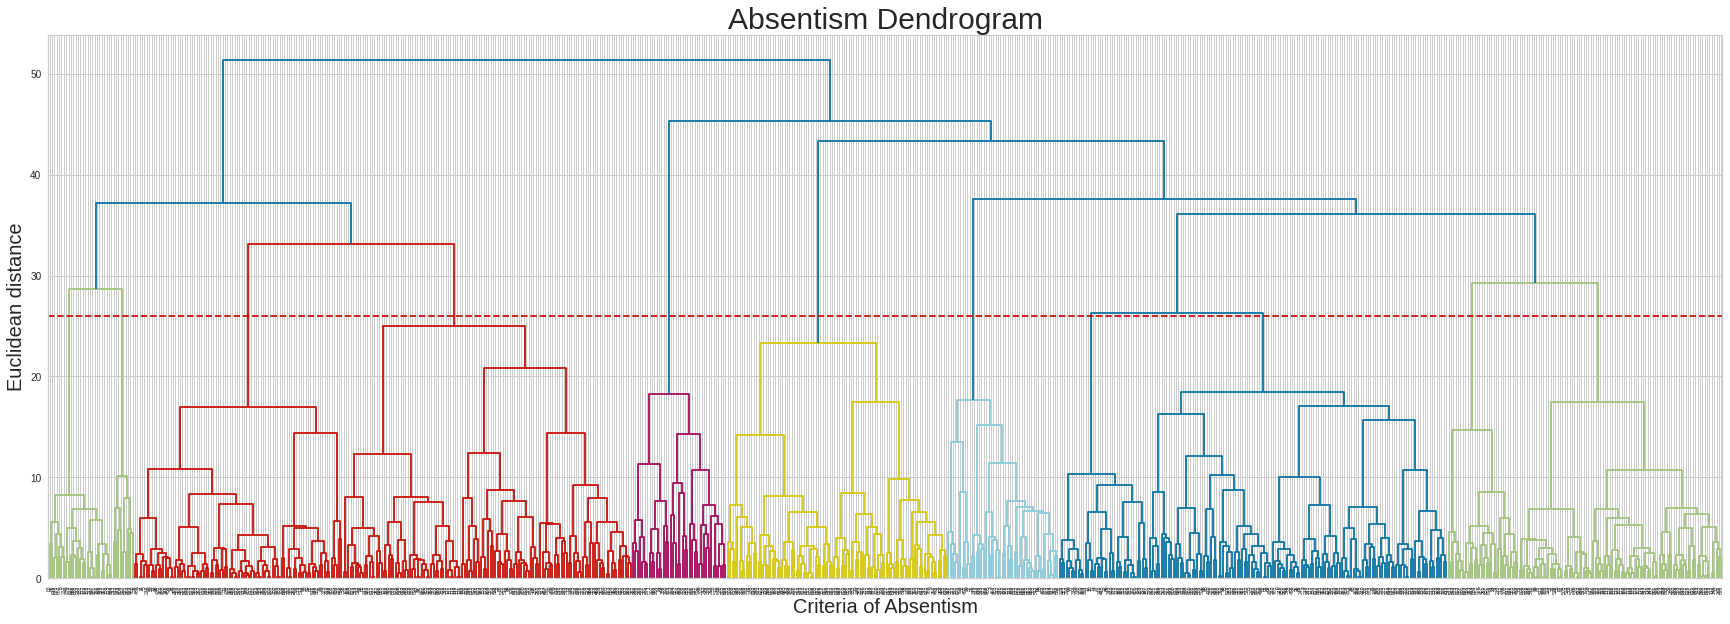

In [29]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(30,10))
den = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.axhline(y=26, color='r', linestyle = '--')
plt.title('Absentism Dendrogram',fontsize=30)
plt.xlabel('Criteria of Absentism',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

In [30]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=11)
agg.fit(df_scaled)
agg_score = silhouette_score(df_scaled, agg.labels_)
print('Silhouette Score of Agglomerative Clustering with all dimensions is', agg_score)

Silhouette Score of Agglomerative Clustering with all dimensions is 0.19433911470704188


In [31]:
for i in range(12,31):
    agg_exp = AgglomerativeClustering(n_clusters=i)
    agg_exp.fit(df_scaled)
    agg_score_exp = silhouette_score(df_scaled, agg_exp.labels_)
    print(f'Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as {i} is', agg_score_exp)

Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 12 is 0.2065167357526004
Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 13 is 0.2207133027410592
Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 14 is 0.23174374386960217
Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 15 is 0.229815790246411
Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 16 is 0.23342610951202078
Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 17 is 0.23929245677302113
Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 18 is 0.22541465582365483
Silhouette Score of Agglomerative Clustering with all dimensions and number of clusters as 19 is 0.23236444739180764
Silhouette Score of Agglomerative Clustering with all dimensions and

### With Dimension Reduction:

In [32]:
agg_pca = AgglomerativeClustering(n_clusters=11)
agg_pca.fit_predict(pca_df)
agg_pca_score = silhouette_score(pca_df, agg_pca.labels_)
print('Silhouette Score of Agglomerative Clustering without all dimensions is', agg_pca_score)

Silhouette Score of Agglomerative Clustering without all dimensions is 0.3124777861967189


### LINKAGE WITH SINGLE:

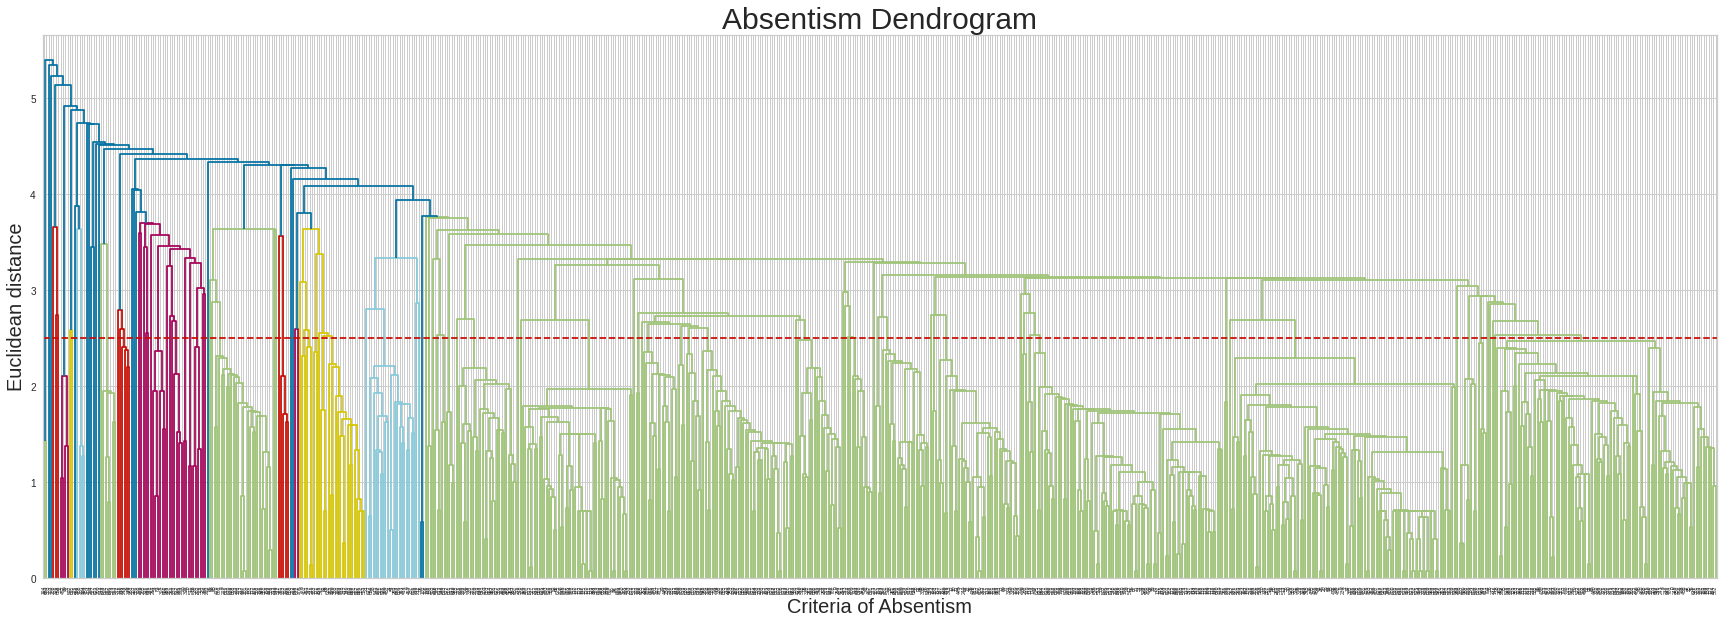

In [33]:
plt.figure(figsize=(30,10))
den = sch.dendrogram(sch.linkage(df_scaled, method='single'))
plt.axhline(y=2.5, color='r', linestyle = '--')
plt.title('Absentism Dendrogram',fontsize=30)
plt.xlabel('Criteria of Absentism',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

### LINKAGE WITH COMPLETE:

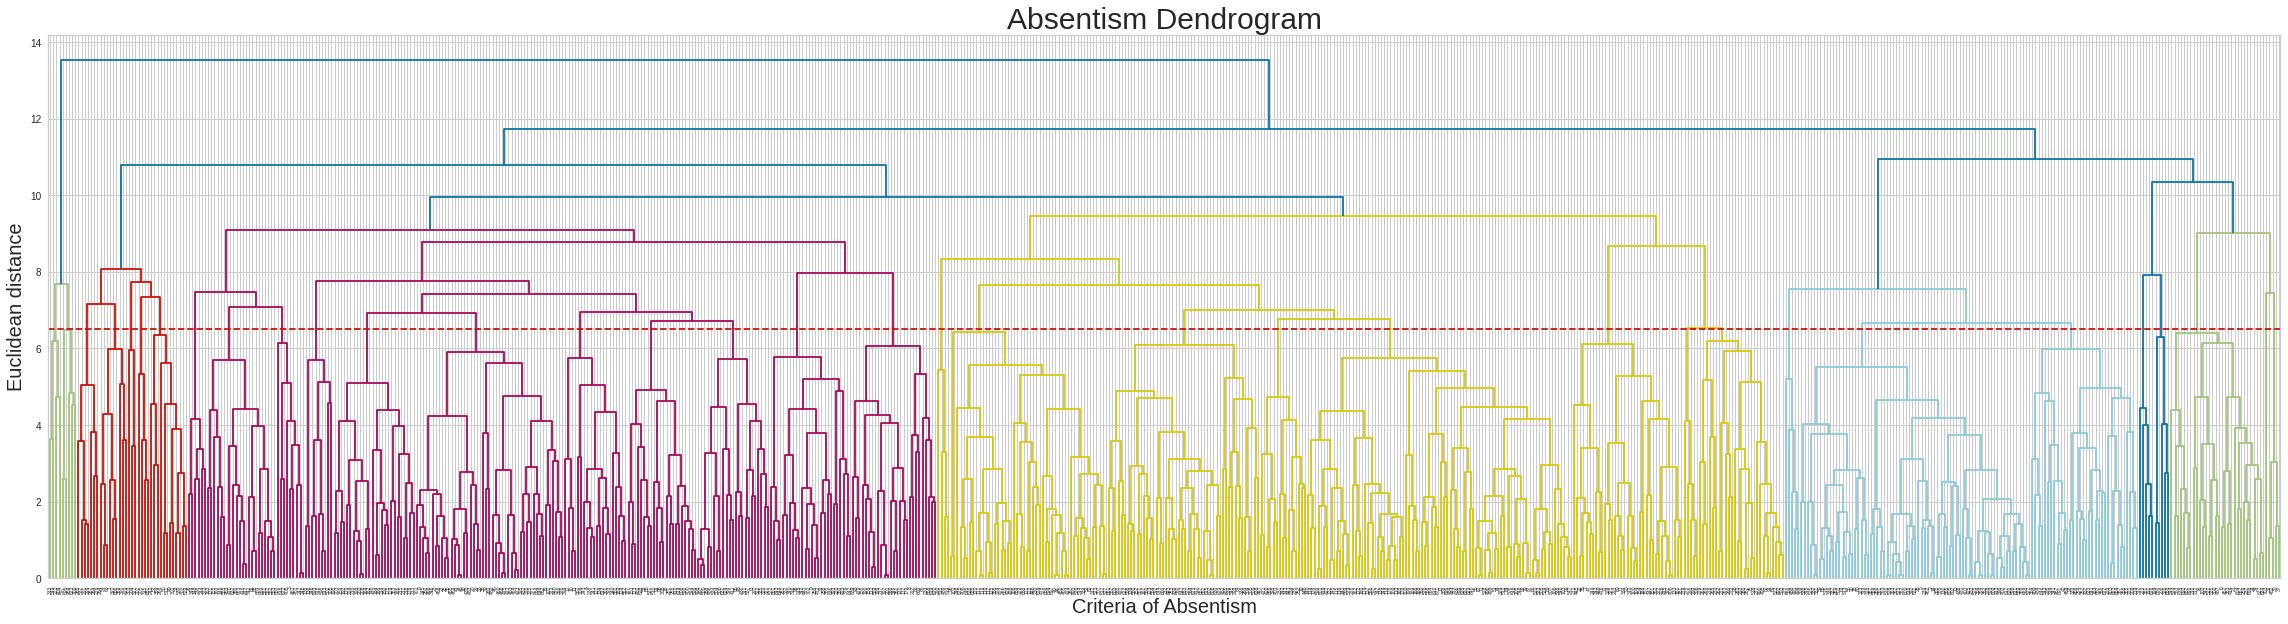

In [34]:
plt.figure(figsize=(40,10))
den = sch.dendrogram(sch.linkage(df_scaled, method='complete'))
plt.axhline(y=6.5, color='r', linestyle = '--')
plt.title('Absentism Dendrogram',fontsize=30)
plt.xlabel('Criteria of Absentism',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

#### No of clusters = 34 with complete method.

### Without Dimension Reduction:

In [35]:
agg_comp = AgglomerativeClustering(n_clusters=34, linkage='complete')
agg_comp.fit(df_scaled)
agg_comp_score = silhouette_score(df_scaled, agg_comp.labels_)
print('Silhouette Score of Agglomerative Clustering with all dimensions is', agg_comp_score)

Silhouette Score of Agglomerative Clustering with all dimensions is 0.24984308463330243


### With Dimension Reduction:

In [36]:
agg_pca_comp = AgglomerativeClustering(n_clusters=34, linkage='complete')
agg_pca_comp.fit_predict(pca_df)
agg_pca_comp_score = silhouette_score(pca_df, agg_pca_comp.labels_)
print('Silhouette Score of Agglomerative Clustering without all dimensions is', agg_pca_comp_score)

Silhouette Score of Agglomerative Clustering without all dimensions is 0.3252726384084917


### LINKAGE WITH AVERAGE:

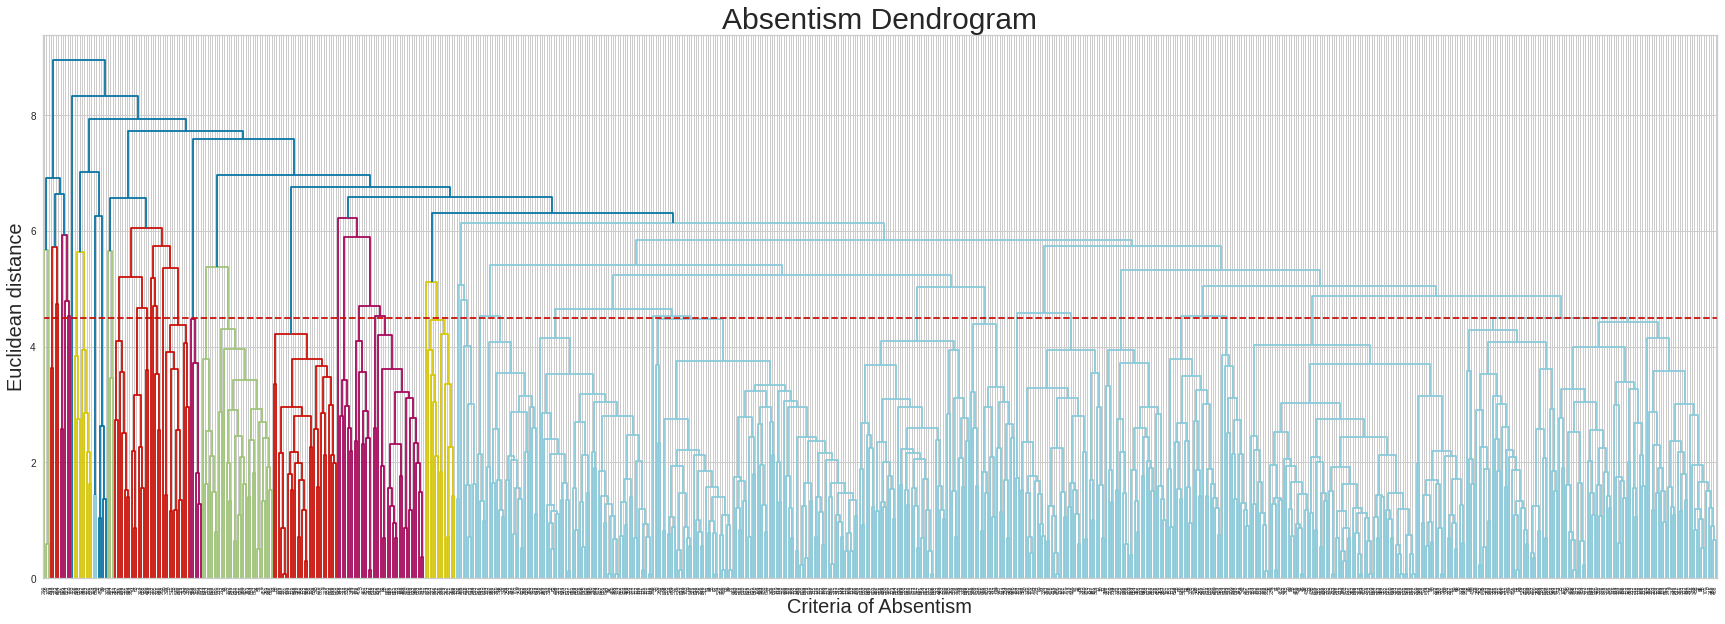

In [37]:
plt.figure(figsize=(30,10))
den = sch.dendrogram(sch.linkage(df_scaled, method='average'))
plt.axhline(y=4.5, color='r', linestyle = '--')
plt.title('Absentism Dendrogram',fontsize=30)
plt.xlabel('Criteria of Absentism',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

## DBSCAN:

### Without Dimension Reduction:

In [38]:
km_labels = km.labels_.reshape(-1,1)

In [39]:
df_scaled = np.concatenate([df_scaled, km_labels], axis = 1)
df_scaled

array([[ 0.8396455 ,  0.17318229, -0.62543981, ...,  0.79118362,
        -0.23113317,  0.        ],
       [-2.22752522,  0.17318229, -0.62543981, ...,  1.02637336,
        -0.52528371,  3.        ],
       [ 0.48574119,  0.17318229,  0.07656417, ...,  1.02637336,
        -0.37820844,  4.        ],
       ...,
       [-2.22752522, -1.88418996, -0.62543981, ...,  1.73194259,
        -0.52528371,  7.        ],
       [-2.22752522, -1.88418996,  0.07656417, ...,  1.96713233,
        -0.52528371,  4.        ],
       [-2.22752522, -1.88418996,  1.48057214, ..., -0.38476509,
        -0.52528371,  6.        ]])

In [40]:
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=9)
nbrs = neigh.fit(df_scaled)
distance, indices = nbrs.kneighbors(df_scaled)

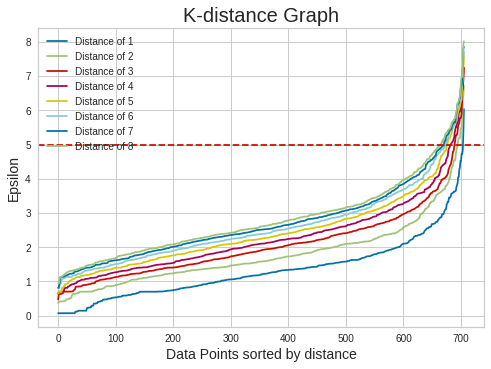

In [41]:
distances = np.sort(distance, axis=0)
distances_1 = distances[:,1]
distances_2 = distances[:,2]
distances_3 = distances[:,3]
distances_4 = distances[:,4]
distances_5 = distances[:,5]
distances_6 = distances[:,6]
distances_7 = distances[:,7]
distances_8 = distances[:,8]
plt.plot(distances_1, label = 'Distance of 1')
plt.plot(distances_2, label = 'Distance of 2')
plt.plot(distances_3, label = 'Distance of 3')
plt.plot(distances_4, label = 'Distance of 4')
plt.plot(distances_5, label = 'Distance of 5')
plt.plot(distances_6, label = 'Distance of 6')
plt.plot(distances_7, label = 'Distance of 7')
plt.plot(distances_8, label = 'Distance of 8')
plt.axhline(y=5, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.legend()
plt.show()

In [42]:
from sklearn.cluster import DBSCAN

eps = 5
for i in range(2,35):
    db_exp = DBSCAN(eps = eps, min_samples=i)
    db_exp_labels = db_exp.fit_predict(df_scaled)
    x = db_exp_labels+2
    y=np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', i, '| obtained clustering: ', results)

eps= 5 | min_samples=  2 | obtained clustering:  [(1, 2), (2, 590), (3, 46), (4, 30), (5, 29), (6, 2), (7, 3), (8, 2), (9, 2)]
eps= 5 | min_samples=  3 | obtained clustering:  [(1, 8), (2, 590), (3, 46), (4, 30), (5, 29), (6, 3)]
eps= 5 | min_samples=  4 | obtained clustering:  [(1, 11), (2, 590), (3, 46), (4, 30), (5, 29)]
eps= 5 | min_samples=  5 | obtained clustering:  [(1, 12), (2, 589), (3, 46), (4, 30), (5, 29)]
eps= 5 | min_samples=  6 | obtained clustering:  [(1, 15), (2, 589), (3, 44), (4, 30), (5, 28)]
eps= 5 | min_samples=  7 | obtained clustering:  [(1, 17), (2, 587), (3, 44), (4, 30), (5, 28)]
eps= 5 | min_samples=  8 | obtained clustering:  [(1, 17), (2, 587), (3, 44), (4, 30), (5, 28)]
eps= 5 | min_samples=  9 | obtained clustering:  [(1, 17), (2, 587), (3, 44), (4, 30), (5, 28)]
eps= 5 | min_samples=  10 | obtained clustering:  [(1, 19), (2, 587), (3, 42), (4, 30), (5, 28)]
eps= 5 | min_samples=  11 | obtained clustering:  [(1, 19), (2, 587), (3, 42), (4, 30), (5, 28)]


In [43]:
db = DBSCAN(eps=5, min_samples=7)
db.fit_predict(df_scaled)

array([ 0,  0,  0,  1,  0,  0,  2,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  2,  0,  0,  2,  0,  1,  0,  0,  0, -1,  0,  1,  0,
        2,  0,  0, -1,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  0,  0,  1,  0,  3,  0,
        0,  3,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  3,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  1,  3,  0,  3,  0,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  0,  0,  3,  0,  3,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  3,  1,  0,  0, -1,  0,  3,  3,  0,  0,  0,  3,  0,  0,
       -1,  0, -1,  0,  0,  0,  2,  0,  2,  0,  0,  0,  0,  3,  0,  0,  0,
        0, -1,  1,  0,  0

In [44]:
db_score = silhouette_score(df_scaled, db.labels_)
print('Silhouette Score of DBSCAN with all dimensions is', db_score)

Silhouette Score of DBSCAN with all dimensions is 0.1370232185126284


In [45]:
db = DBSCAN(eps=5, min_samples=9)
db.fit_predict(df_scaled)
db_score = silhouette_score(df_scaled, db.labels_)
print('Silhouette Score of DBSCAN with all dimensions is', db_score)

Silhouette Score of DBSCAN with all dimensions is 0.1370232185126284


### With Dimension Reduction:

In [46]:
eps = 2.5
for i in range(5,35):
    best1 = DBSCAN(eps = eps, min_samples=i)
    best_labels1 = best1.fit_predict(pca_df)
    x1 = best_labels1+2
    y1=np.bincount(x1)
    iii = np.nonzero(y1)[0]
    results = list(zip(iii,y[iii]) )
    print('eps=',eps,'| min_samples= ', i, '| obtained clustering: ', results)

eps= 2.5 | min_samples=  5 | obtained clustering:  [(2, 554)]
eps= 2.5 | min_samples=  6 | obtained clustering:  [(2, 554)]
eps= 2.5 | min_samples=  7 | obtained clustering:  [(2, 554)]
eps= 2.5 | min_samples=  8 | obtained clustering:  [(2, 554)]
eps= 2.5 | min_samples=  9 | obtained clustering:  [(2, 554)]
eps= 2.5 | min_samples=  10 | obtained clustering:  [(2, 554)]
eps= 2.5 | min_samples=  11 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  12 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  13 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  14 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  15 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  16 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  17 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  18 | obtained clustering:  [(1, 118), (2, 554)]
eps= 2.5 | min_samples=  19 | obtained clus

In [47]:
db_pca = DBSCAN(eps=2.5, min_samples=11)
db_pca.fit_predict(pca_df)

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [48]:
db_pca_score = silhouette_score(pca_df, db_pca.labels_)
print('Silhouette Score of DBSCAN with dimensions reduction is', db_pca_score)

Silhouette Score of DBSCAN with dimensions reduction is 0.4054977367373273


## Mini-Batch K-Means:

### Purpose:
Mini-Batch K-Means is a modified version of k-means that makes updates to the cluster centroids using mini-batches of samples rather than the entire dataset, which can make it faster for large datasets, and perhaps more robust to statistical noise.

Without Dimensions Reduction:

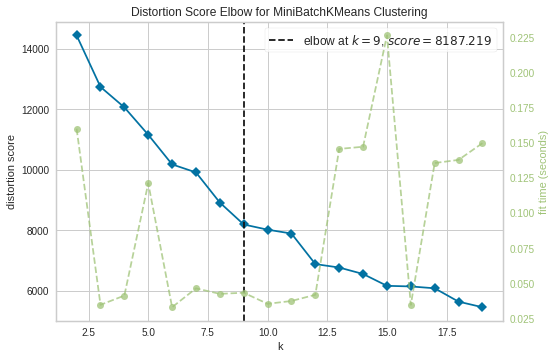

In [49]:
from sklearn.cluster import MiniBatchKMeans

mini_km = MiniBatchKMeans(random_state=42)

visual = KElbowVisualizer(mini_km, k=(2,20), timings=True)

visual.fit(df_scaled)
visual.show();

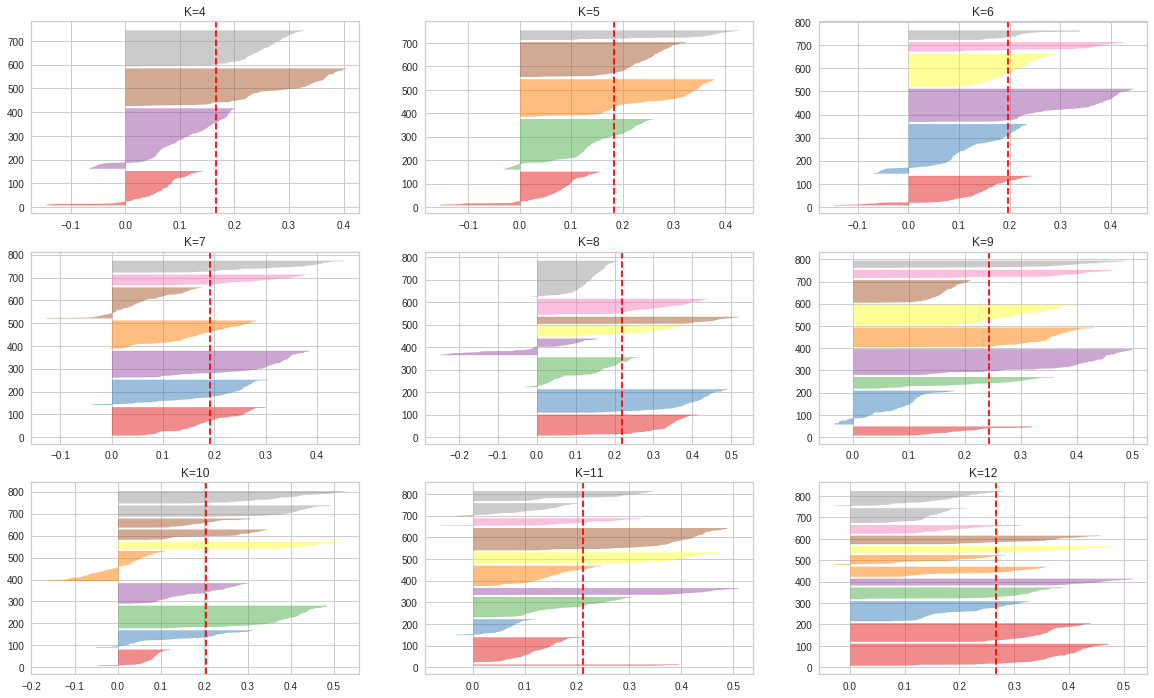

In [50]:
fig , axes = plt.subplots(3,3,figsize=(20,12))

for i,ax in zip([4,5,6,7,8,9,10,11,12],axes.flatten()):
    model1 = MiniBatchKMeans(n_clusters = i, random_state=42)
    ax.set_title(f'K={i}')
    Visualizer = SilhouetteVisualizer(model1 , color = 'yellowbrick' , ax = ax)
    Visualizer.fit(df_scaled)

In [51]:
mini_km = MiniBatchKMeans(n_clusters= 6, random_state=42)
mini_km.fit_predict(df_scaled)
mini_km_score = silhouette_score(df_scaled, mini_km.labels_)
print('Silhouette Score of Mini Batch KMean with all dimensions is', mini_km_score)

Silhouette Score of Mini Batch KMean with all dimensions is 0.19609168864181864


In [52]:
mini_km = MiniBatchKMeans(n_clusters= 9, random_state=42)
mini_km.fit_predict(df_scaled)
mini_km_score = silhouette_score(df_scaled, mini_km.labels_)
print('Silhouette Score of Mini Batch KMean with all dimensions is', mini_km_score)

Silhouette Score of Mini Batch KMean with all dimensions is 0.2421711477337412


With Dimensions Reduction:

In [53]:
mini_km_pca = MiniBatchKMeans(n_clusters= 9, random_state=42)
mini_km_pca.fit_predict(pca_df)
mini_km_pca_score = silhouette_score(pca_df, mini_km_pca.labels_)
print('Silhouette Score of Mini Batch KMean without all dimensions is', mini_km_pca_score)

Silhouette Score of Mini Batch KMean without all dimensions is 0.3057896561330028


### COMPARISON OF UN-SUPERVISED LEARNING:

In [54]:
scores = [km_score, agg_score, db_score]
scores_pca = [km_pca_score, agg_pca_score, db_pca_score]

In [55]:
best_model = pd.DataFrame()

In [56]:
best_model['Models'] = ['KMean', 'Agg CLustering', 'DBSCAN']
best_model['With all Dimensions'] = scores
best_model['With Dimensions Reduction'] = scores_pca

In [57]:
best_model.loc[len(best_model.index)] = ['Mini Batch KMeans', mini_km_score, mini_km_pca_score]

In [58]:
best_model

,Models,With all Dimensions,With Dimensions Reduction
0,KMean,0.186325,0.305480
1,Agg CLustering,0.194339,0.312478
2,DBSCAN,0.137023,0.405498
3,Mini Batch KMeans,0.242171,0.305790


In [59]:
plot_df = pd.DataFrame(pca_df)

In [60]:
plot_df

,0,1,2,3
0,0.729006,1.033140,-1.591634,0.280967
1,3.480010,-0.950572,2.961208,1.481249
2,2.108812,0.030054,-1.865854,-0.406757
3,-0.555224,0.095011,0.710285,2.737311
4,0.657020,1.174784,-1.562698,0.384849
...,...,...,...,...
701,0.784696,1.322240,-0.469874,0.454073
702,-0.235390,-1.624358,0.857156,-0.543187
703,1.177514,0.248956,-0.067508,1.077274
704,1.951680,0.795288,-0.150120,1.396325


In [61]:
plot_df['Agg_Labels']=agg_pca.labels_

In [62]:
plot_df.head()

,0,1,2,3,Agg_Labels
0,0.729006,1.033140,-1.591634,0.280967,1
1,3.480010,-0.950572,2.961208,1.481249,9
2,2.108812,0.030054,-1.865854,-0.406757,6
3,-0.555224,0.095011,0.710285,2.737311,4
4,0.657020,1.174784,-1.562698,0.384849,1


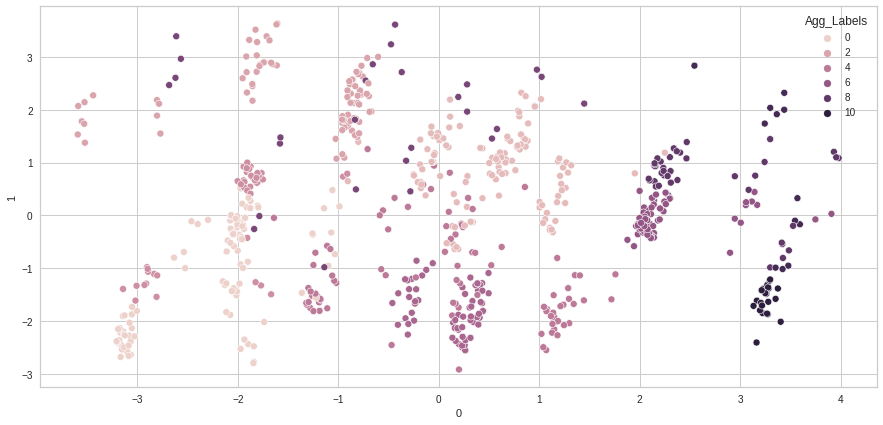

In [63]:
plt.figure(figsize=(15,7))
sb.scatterplot(plot_df[0], plot_df[1], hue = plot_df['Agg_Labels'], cmap='Sequential');

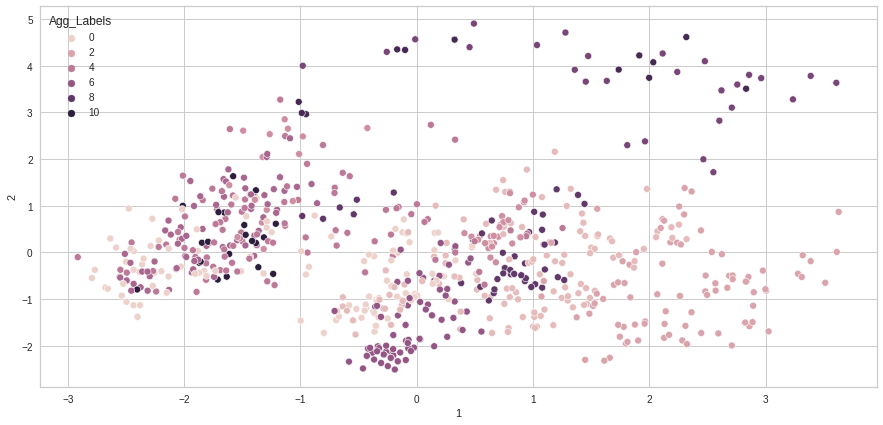

In [64]:
plt.figure(figsize=(15,7))
sb.scatterplot(plot_df[1], plot_df[2], hue = plot_df['Agg_Labels'], cmap='Sequential');

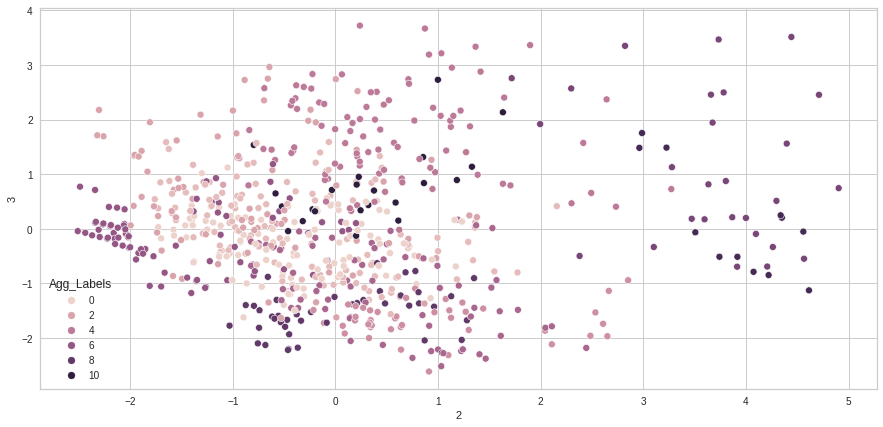

In [65]:
plt.figure(figsize=(15,7))
sb.scatterplot(plot_df[2], plot_df[3], hue = plot_df['Agg_Labels'], cmap='Sequential');

In [66]:
copy_df.columns

Index(['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [67]:
columns = ['Reason for absence', 'Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours', 'KMeans_Labels']

In [68]:
sup_df = pd.DataFrame(df_scaled, columns = columns)
sup_df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,KMeans_Labels
0,0.839646,0.173182,-0.625440,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184,-0.231133,0.0
1,-2.227525,0.173182,-0.625440,-1.382645,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,...,-0.434835,-0.055172,0.877168,-0.287788,-0.577243,1.477769,0.941840,1.026373,-0.525284,3.0
2,0.485741,0.173182,0.076564,-1.382645,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,...,-0.434835,-0.961024,0.877168,-0.287788,-0.577243,0.777564,-0.357821,1.026373,-0.378208,4.0
3,-1.401748,0.173182,0.778568,-1.382645,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,...,-0.434835,0.850679,0.877168,3.474777,-0.577243,-0.856246,-0.682736,-0.619955,-0.231133,8.0
4,0.485741,0.173182,0.778568,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184,-0.378208,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701,-0.575972,0.173182,-0.625440,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.189851,-0.407286,...,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184,0.063017,0.0
702,-0.929876,0.173182,-0.625440,-1.382645,0.178787,-1.245043,0.344451,0.079473,-0.189851,-0.407286,...,2.545686,-0.055172,-1.140033,-0.287788,0.173279,0.699764,-0.032906,0.555994,-0.231133,5.0
703,-2.227525,-1.884190,-0.625440,-1.382645,-1.561100,-1.040909,0.115466,0.536877,-0.022089,0.118869,...,-0.434835,-0.055172,0.877168,-0.287788,5.426931,1.477769,-0.357821,1.731943,-0.525284,7.0
704,-2.227525,-1.884190,0.076564,-0.490371,0.119304,0.388028,0.344451,0.384409,-0.022089,0.118869,...,-0.434835,0.850679,0.877168,-0.287788,0.923801,1.633370,-0.357821,1.967132,-0.525284,4.0


In [69]:
sup_df['Agg_Labels']=agg_pca.labels_

In [70]:
sup_df.drop('KMeans_Labels', axis = 1, inplace = True)

In [71]:
sup_df.head()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Agg_Labels
0,0.839646,0.173182,-0.625440,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184,-0.231133,1
1,-2.227525,0.173182,-0.625440,-1.382645,-1.561100,-1.108954,1.260392,2.061557,-0.825141,0.645025,...,-0.434835,-0.055172,0.877168,-0.287788,-0.577243,1.477769,0.941840,1.026373,-0.525284,9
2,0.485741,0.173182,0.076564,-1.382645,-0.653979,1.476741,1.260392,0.231941,-0.825141,0.645025,...,-0.434835,-0.961024,0.877168,-0.287788,-0.577243,0.777564,-0.357821,1.026373,-0.378208,6
3,-1.401748,0.173182,0.778568,-1.382645,0.833103,-1.653311,0.344451,0.384409,-0.825141,0.645025,...,-0.434835,0.850679,0.877168,3.474777,-0.577243,-0.856246,-0.682736,-0.619955,-0.231133,4
4,0.485741,0.173182,0.778568,-1.382645,0.981812,0.456072,0.115466,-0.530399,-0.825141,0.645025,...,-0.434835,0.850679,0.877168,-0.287788,0.173279,0.855365,-0.032906,0.791184,-0.378208,1


In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

In [73]:
y = sup_df['Agg_Labels']
x = sup_df
x.drop('Agg_Labels', axis = 1, inplace = True)

Baseline: Decision Tree Classifier

In [74]:
results = list()
names = list()

In [75]:
# define the model
model1 = DecisionTreeClassifier(random_state=42)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores1 = cross_val_score(model1, x,y, scoring='f1_weighted', cv=cv)

results.append(n_scores1)
names.append('DTC')

# report performance
print('F1-Score: %.3f (%.3f)' % (n_scores1.mean(), n_scores1.std()))

F1-Score: 0.950 (0.027)


Bagging with Random Forest:

In [76]:
# define the model
model2 = RandomForestClassifier(random_state = 42)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores2 = cross_val_score(model2, x,y, scoring='f1_weighted', cv=cv)

results.append(n_scores2)
names.append('Random Forest')

# report performance
print('F1-Score: %.3f (%.3f)' % (n_scores2.mean(), n_scores2.std()))

F1-Score: 0.958 (0.019)


Boosting with Adaboost:

In [77]:
# define the model
model3 = AdaBoostClassifier(random_state = 42)

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores3 = cross_val_score(model3, x,y, scoring='f1_weighted', cv=cv)

results.append(n_scores3)
names.append('Adaboost')

# report performance
print('F1-Score: %.3f (%.3f)' % (n_scores3.mean(), n_scores3.std()))

F1-Score: 0.227 (0.032)


Grid Search CV:

In [78]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [79]:
# grid search model
grid_search = GridSearchCV(estimator=model2,
                           param_grid=params,
                           cv = 4,
                           scoring="f1_weighted")

In [80]:
grid_search.fit(x,y)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='f1_weighted')

In [81]:
grid_search.best_score_

0.8714751887486509

In [82]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       random_state=42)

In [83]:
imp_df = pd.DataFrame({"Varname": x.columns, "Imp": rf_best.feature_importances_})

In [84]:
contributors_df = imp_df.sort_values(by="Imp", ascending=False)

In [85]:
contributors_df.head(10)

,Varname,Imp
5,Distance from Residence to Work,0.150459
6,Service time,0.109310
7,Age,0.095590
4,Transportation expense,0.093603
18,Body mass index,0.077653
1,Month of absence,0.071900
12,Son,0.066503
3,Seasons,0.053835
16,Weight,0.051519
17,Height,0.045292


In [86]:
top_10 = contributors_df.head(10)

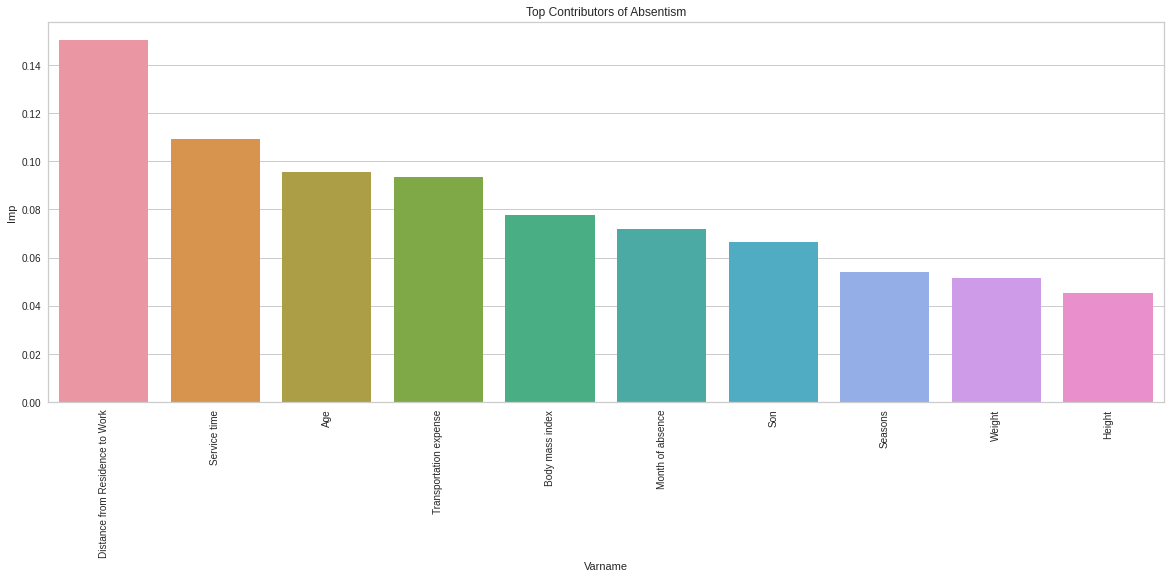

In [87]:
plt.figure(figsize=(20,7))
sb.barplot(y = top_10['Imp'], x = top_10['Varname'])
plt.xticks(rotation=90)
plt.title('Top Contributors of Absentism')
plt.show()

Conclusion:

1. The best suited algorithm is Agglomerative Clustering Algorithm for the given dataset. The silhouette score of Agglomerative Clustering Algorithm with PCA have is highest compared to other models.
2. The contributors of absentism are:
  - Distance from Residence to work
  - Service time
  - Age
  - Transportation Expense
  - Body Mass Index
  - Month of Absence
  - Son
  - Seasons
